In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
df = pd.read_excel("crop yield data sheet.xlsx")
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


**Data Preprocessing**

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      100 non-null    object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.1+ KB


In [66]:
df['Temperatue'].unique()

array([28, 36, 29, 35, 27, 34, 37, 39, 26, 38, 24, 25, 40, nan, ':'],
      dtype=object)

In [67]:
df = df[df['Temperatue']!=':']

In [68]:
df['Temperatue'] = df['Temperatue'].astype(float)

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [77]:
#replacing missing values with mean
df.loc[df['Rain Fall (mm)'].isnull(),'Rain Fall (mm)'] = df['Rain Fall (mm)'].mean()
df.loc[df['Fertilizer'].isnull(),'Fertilizer'] = df['Fertilizer'].mean()
df.loc[df['Temperatue'].isnull(),'Temperatue'] = df['Temperatue'].mean()
df.loc[df['Nitrogen (N)'].isnull(),'Nitrogen (N)'] = df['Nitrogen (N)'].mean()
df.loc[df['Phosphorus (P)'].isnull(),'Phosphorus (P)'] = df['Phosphorus (P)'].mean()
df.loc[df['Potassium (K)'].isnull(),'Potassium (K)'] = df['Potassium (K)'].mean()
df.loc[df['Yeild (Q/acre)'].isnull(),'Yeild (Q/acre)'] = df['Yeild (Q/acre)'].mean()

In [79]:
df.isnull().sum()

Rain Fall (mm)    0
Fertilizer        0
Temperatue        0
Nitrogen (N)      0
Phosphorus (P)    0
Potassium (K)     0
Yeild (Q/acre)    0
dtype: int64

In [81]:
df.describe()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,849.797980,67.808081,32.393939,70.737374,21.131313,18.060606,9.050505
std,382.848961,9.597193,5.193127,6.390100,1.867811,1.739149,1.881408
min,400.000000,50.000000,24.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,28.000000,65.000000,20.000000,16.000000,7.000000
50%,849.797980,70.000000,32.393939,70.737374,21.131313,18.060606,9.050505
75%,1226.250000,77.000000,38.000000,76.250000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,40.000000,80.000000,25.000000,22.000000,12.000000


**Exploratory Data Analysis**

<Axes: xlabel='Rain Fall (mm)', ylabel='Count'>

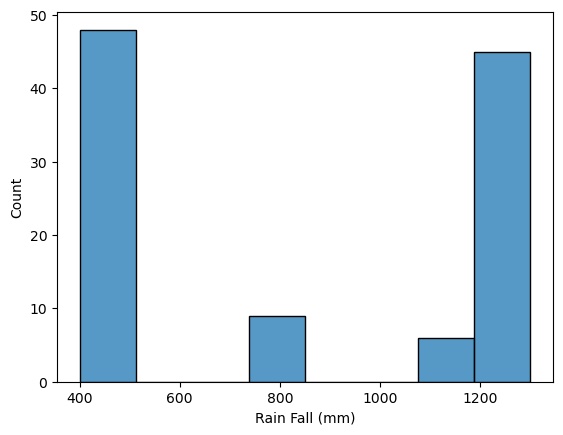

In [97]:
sns.histplot(x = 'Rain Fall (mm)',data = df)

<Axes: xlabel='Fertilizer', ylabel='Count'>

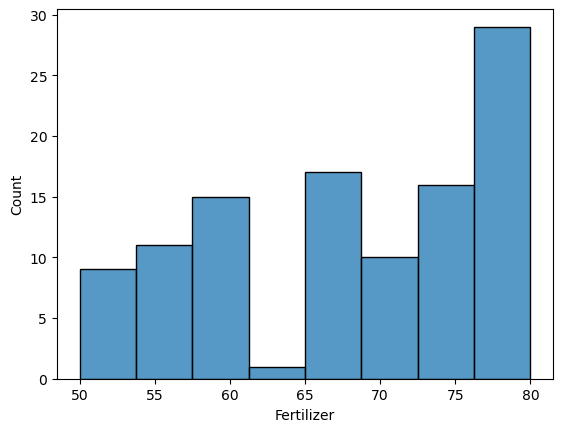

In [101]:
sns.histplot(x = 'Fertilizer',data = df)

<Axes: xlabel='Temperatue', ylabel='Count'>

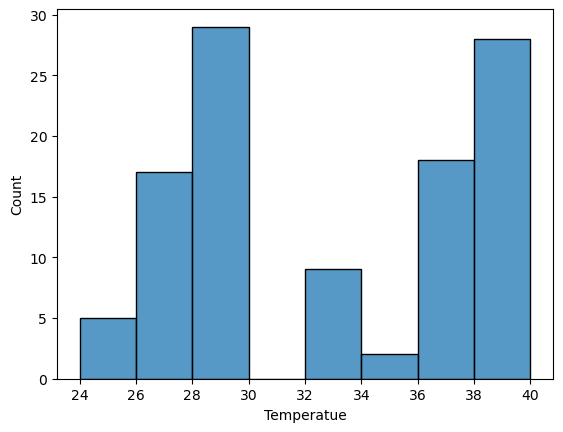

In [103]:
sns.histplot(x = 'Temperatue',data = df)

<Axes: xlabel='Nitrogen (N)', ylabel='Count'>

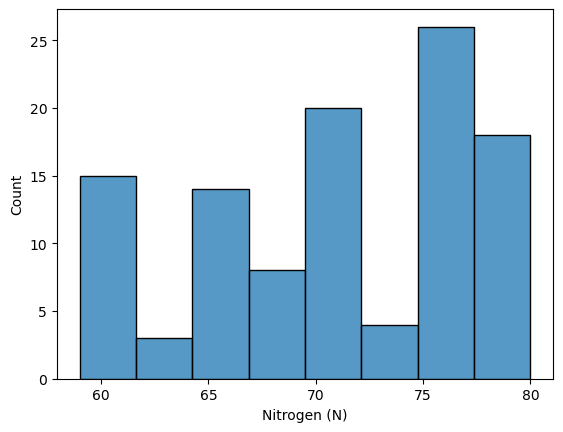

In [105]:
sns.histplot(x = 'Nitrogen (N)', data = df)

<Axes: xlabel='Phosphorus (P)', ylabel='Count'>

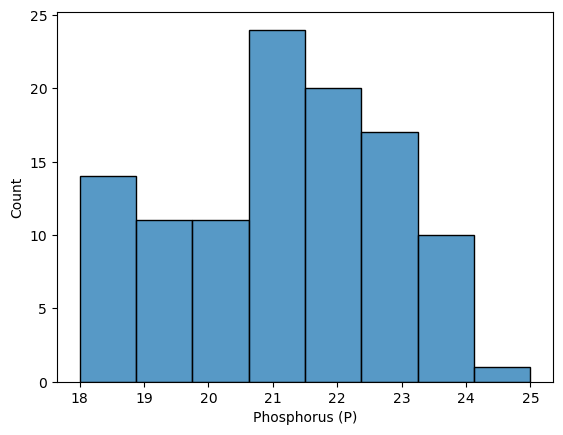

In [107]:
sns.histplot(x = 'Phosphorus (P)',data = df)

<Axes: xlabel='Potassium (K)', ylabel='Count'>

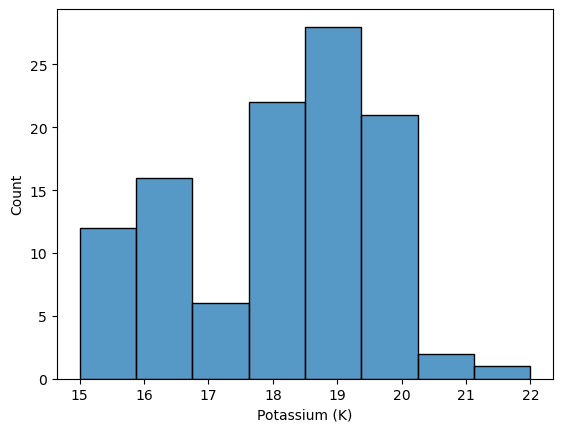

In [109]:
sns.histplot(x = 'Potassium (K)',data = df)

**Correlation Matrix Heatmap**

<Axes: >

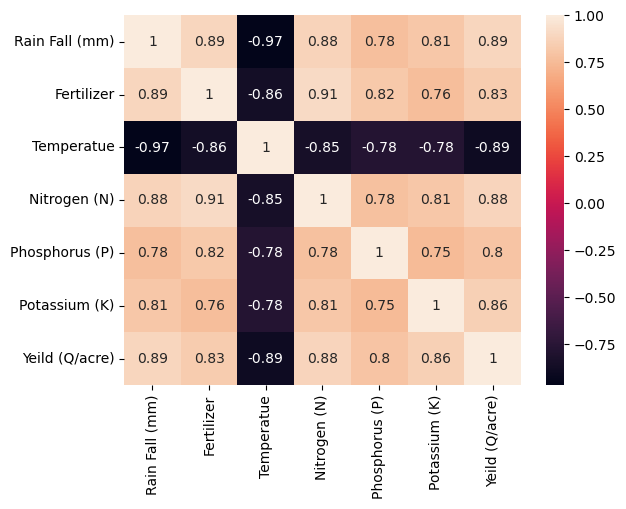

In [111]:
sns.heatmap(df.corr(), annot = True)

In [85]:
X = df.drop(['Yeild (Q/acre)'],axis =1)
y = df['Yeild (Q/acre)']

In [89]:
##Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(86, 6) (22, 6) (86,) (22,)


**Model Building**

In [91]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [93]:
y_pred = LR.predict(x_test)

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Linear Regression: ")
print ("Mean Squared Error :",mean_squared_error(y_test,y_pred))
print ("Mean Absolute Error :",mean_absolute_error(y_test,y_pred))
print ("R2 Score : ",r2_score(y_test,y_pred))

Linear Regression: 
Mean Squared Error : 0.4464594400971723
Mean Absolute Error : 0.5222539312594301
R2 Score :  0.8759723104180718


In [115]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [117]:
y_pred1 = RF.predict(x_test)

In [121]:
print("Random Forest :")
print ("Mean Squared Error :",mean_squared_error(y_test,y_pred1))
print ("Mean Absolute Error :",mean_absolute_error(y_test,y_pred1))
print ("R2 Score : ",r2_score(y_test,y_pred1))

Random Forest :
Mean Squared Error : 0.49370361856860573
Mean Absolute Error : 0.5492649219467401
R2 Score :  0.8628477446104077


In [123]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [125]:
y_pred2 = DT.predict(x_test)

In [127]:
print("Decision Tree :")
print ("Mean Squared Error :",mean_squared_error(y_test,y_pred2))
print ("Mean Absolute Error :",mean_absolute_error(y_test,y_pred2))
print ("R2 Score : ",r2_score(y_test,y_pred2))

Decision Tree :
Mean Squared Error : 0.48863636363636365
Mean Absolute Error : 0.4772727272727273
R2 Score :  0.8642554422987618


In [129]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [131]:
y_pred3 = KNN.predict(x_test)

In [133]:
print("KNN :")
print ("Mean Squared Error :",mean_squared_error(y_test,y_pred3))
print ("Mean Absolute Error :",mean_absolute_error(y_test,y_pred3))
print ("R2 Score : ",r2_score(y_test,y_pred3))

KNN :
Mean Squared Error : 0.6831818181818183
Mean Absolute Error : 0.65
R2 Score :  0.8102101672325943


In [135]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)

GradientBoostingRegressor()

In [137]:
y_pred4 = GB.predict(x_test)

In [139]:
print("Gradient Boosting : ")
print ("Mean Squared Error :",mean_squared_error(y_test,y_pred4))
print ("Mean Absolute Error :",mean_absolute_error(y_test,y_pred4))
print ("R2 Score : ",r2_score(y_test,y_pred4))

Gradient Boosting : 
Mean Squared Error : 0.4151432837279448
Mean Absolute Error : 0.4874135460778233
R2 Score :  0.8846720268362447


In [143]:
from sklearn.svm import SVR
SV = SVR()
SV.fit(x_train,y_train)

SVR()

In [145]:
y_pred5 = SV.predict(x_test)

In [147]:
print("Support Vector Regressor : ")
print ("Mean Squared Error :",mean_squared_error(y_test,y_pred5))
print ("Mean Absolute Error :",mean_absolute_error(y_test,y_pred5))
print ("R2 Score : ",r2_score(y_test,y_pred5))

Support Vector Regressor : 
Mean Squared Error : 0.6138829286421138
Mean Absolute Error : 0.6641655340130043
R2 Score :  0.8294615938758121


In [149]:
from sklearn.linear_model import Ridge
RD = Ridge()
RD.fit(x_train,y_train)

Ridge()

In [151]:
y_pred6 = RD.predict(x_test)

In [153]:
print("Ridge : ")
print ("Mean Squared Error :",mean_squared_error(y_test,y_pred6))
print ("Mean Absolute Error :",mean_absolute_error(y_test,y_pred6))
print ("R2 Score : ",r2_score(y_test,y_pred6))

Ridge : 
Mean Squared Error : 0.4446756382084226
Mean Absolute Error : 0.5205395726225617
R2 Score :  0.8764678556055256


**We can conclude that GradientBoosting Regressor or Ridge can be used as the best model as it returns with 88% and 87% accuracy.**